In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [23]:
from experiments import BasicSetup
from experiments import utilities as utils
from bayesinverse import Regression

In [46]:
config_path = config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/basic_setup/config.yaml"
)

basic_setup = BasicSetup(config_path)
# basic_setup.run()


In [60]:
basic_setup.K = basic_setup.transport.get_transport(
    basic_setup.sensors, basic_setup.emissions
)


In [61]:

sensor_ids = basic_setup.sensors.get_sample_ids(10)

basic_setup.reg = Regression(
    y=utils.stack_xr(
        basic_setup.K.isel(sensor=sensor_ids) @ basic_setup.emissions.truth
        + basic_setup.sensors.get_noise(10)
    ).values,
    K=utils.stack_xr(basic_setup.K.isel(sensor=sensor_ids)).values,
    x_prior=utils.stack_xr(basic_setup.emissions.prior).values,
    x_covariance=utils.stack_xr(basic_setup.emissions.prior_covariance).values,
    y_covariance=utils.stack_xr(
        basic_setup.sensors.get_covariance().isel(sensor=sensor_ids)
    ).values,
)
x_est, res, rank, s = basic_setup.reg.fit()
posterior = basic_setup.emissions.to_xr(x_est)


In [59]:
K = basic_setup.transport.get_K(1004, basic_setup.sensors, basic_setup.emissions)


In [27]:
K.sum(dim="sensor")

<xarray.DataArray (source_group: 21)>
array([0.00000000e+00, 6.53034110e-01, 9.96936106e-01, 4.31749243e-02,
       0.00000000e+00, 9.82914391e-02, 8.47297917e-01, 7.51490537e-01,
       2.04706202e-01, 1.37581138e-03, 1.38154076e-02, 0.00000000e+00,
       8.89830838e-02, 9.68725148e-02, 1.46706701e-01, 1.70874522e-01,
       1.25743611e-01, 1.37529567e-02, 1.01987232e-01, 1.08832959e-04,
       0.00000000e+00])
Coordinates:
  * source_group  (source_group) int64 1 2 21 22 23 24 25 ... 34 35 36 37 38 39

In [28]:
basic_setup.emissions.mask


<xarray.DataArray (source_group: 59)>
array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])
Coordinates:
  * source_group  (source_group) int64 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59

In [29]:
basic_setup.K

<xarray.DataArray (sensor: 20, time_measurement: 3, source_group: 21,
                   time_state: 3)>
array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
...
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]]])
Coordinates:
  * time_measurement  (time_measurement) int64 852 301 148
Dimensions without coordinates: sensor, source_group, time_state

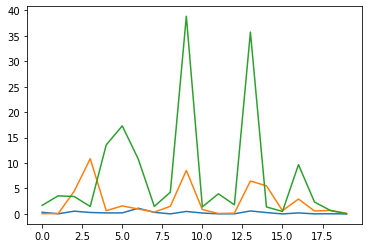

In [30]:
plt.plot((basic_setup.K @ basic_setup.emissions.truth))

In [49]:
x_est, res, rank, s = basic_setup.reg.fit()

In [50]:
posterior = basic_setup.emissions.to_xr(x_est)


In [51]:
utils.stack_xr(posterior)

<xarray.DataArray (state: 63)>
array([-0.00000000e+00,  1.60110113e+00, -3.21047209e-01,  4.44089210e-15,
       -1.21788460e-02,  4.42174659e-01,  4.40212029e-01,  4.15399345e-01,
        4.29696600e-01,  4.07874994e+00,  4.07874994e+00,  3.97541511e+00,
        1.16776367e+00,  1.16776367e+00,  1.16776367e+00,  1.48111933e+00,
        1.12508204e+00,  8.44812744e-01,  7.28389596e-01,  5.43470747e-01,
        5.84860993e-01,  4.71399872e-01,  5.24057717e-01,  6.95571638e-01,
        8.82697785e-01,  1.22702297e+00,  1.57959554e+00,  2.96463511e+01,
        2.74730629e+01,  2.89132268e+01, -7.13473661e-01,  1.18471524e+01,
        1.08446938e+01,  3.84492022e+00,  3.74194208e+00,  3.13717598e+00,
        1.64427978e+00,  1.79997524e+00,  1.64427978e+00,  7.36204688e-01,
        8.35349915e-01,  9.72893133e-01,  9.60710267e-01,  2.36821325e+00,
        8.31189570e-01,  7.45842141e-01,  8.10760988e-01,  1.08584901e+00,
        1.30433870e+00,  1.32639232e+00,  1.41607828e+00,  4.35767732e+00,
        4.19002481e+00,  4.35767732e+00,  1.30813463e+00,  1.30762328e+00,
        1.29040372e+00,  1.06346133e+01,  2.80149520e+00,  1.09121557e+01,
        5.57365537e-01,  8.17179845e-01,  5.57365537e-01])
Coordinates:
  * state         (state) MultiIndex
  - source_group  (state) int64 1 1 1 2 2 2 21 21 21 ... 37 37 38 38 38 39 39 39
  - time_state    (state) int64 0 1 2 0 1 2 0 1 2 0 1 ... 1 2 0 1 2 0 1 2 0 1 2

In [52]:
posterior = posterior * basic_setup.emissions.get_absolute()[basic_setup.emissions.mask]

In [53]:
a = np.array([["a", "b"],["c", "d"]])
b = np.array([[1, 2], [3, 4]])
np.tensordot(b, b, axes=0).reshape(4, 4), np.tensordot(b, b, axes=0).shape

(array([[ 1,  2,  3,  4],
        [ 2,  4,  6,  8],
        [ 3,  6,  9, 12],
        [ 4,  8, 12, 16]]),
 (2, 2, 2, 2))

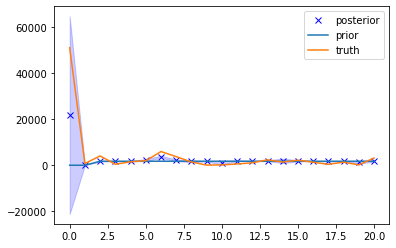

In [54]:
mean = posterior.mean("time_state")
std = posterior.std("time_state")
line = plt.plot(mean, "bx", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(basic_setup.emissions.prior_absolute.mean("time_state"), label="prior")
plt.plot(basic_setup.emissions.truth_absolute.mean("time_state"), label="truth")
plt.legend()

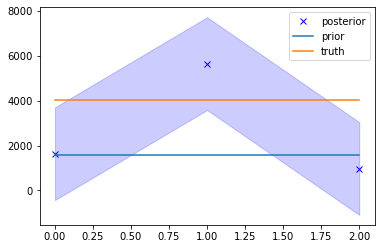

In [56]:
mean = posterior.mean("source_group")
std = np.tile(posterior.mean("source_group").std("time_state"), len(mean))
line = plt.plot(mean, "bx", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(basic_setup.emissions.prior_absolute.mean("source_group"), label="prior")
plt.plot(basic_setup.emissions.truth_absolute.mean("source_group"), label="truth")
plt.legend()

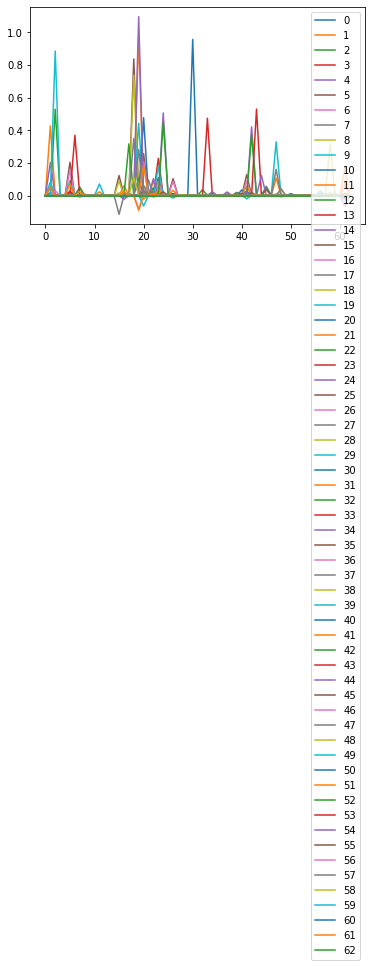

In [57]:
averaging_kernel = basic_setup.reg.get_averaging_kernel()
for i in range(averaging_kernel.shape[0]):
    kernel = averaging_kernel[i]
    plt.plot(kernel, label=i)
plt.legend()


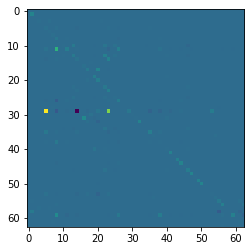

In [39]:
plt.imshow(basic_setup.reg.get_averaging_kernel())

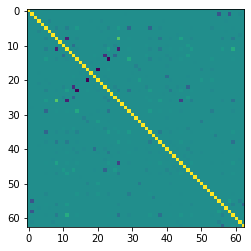

In [40]:
plt.imshow(basic_setup.reg.get_correlation())

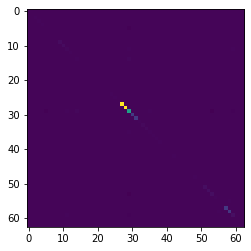

In [41]:
plt.imshow(basic_setup.reg.get_posterior_covariance())

In [42]:
basic_setup.reg.get_information_content(), basic_setup.reg.get_dof_signal(), basic_setup.reg.get_dof_noise()

(30.022413362988466, 19.125149974231448, 43.87485002576853)